In [1]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(readr)
library(class)
library(caret)
library(glmnet)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'caret' was built under R version 4.3.3"
Loading required package: lattice

Warning message:
"package 'glmnet' was built under R version 4.3.3"
Loading required package: Matrix

Loaded glmnet 4.1-8



In [2]:
# Read the CSV file
walmart_path <- read_csv("Desktop/dmml_Ca1/walmart.csv")
str(walmart_path)

New names:
• `` -> `...1`
Rows: 423325 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): Type
dbl  (14): ...1, Store, Dept, Weekly_Sales, Temperature, Fuel_Price, MarkDow...
lgl   (1): IsHoliday
date  (1): Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [423,325 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1        : num [1:423325] 1 2 3 4 5 6 7 8 9 10 ...
 $ Store       : num [1:423325] 1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : Date[1:423325], format: "2010-02-05" "2010-02-05" ...
 $ IsHoliday   : logi [1:423325] FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Dept        : num [1:423325] 1 26 17 45 28 79 55 5 58 7 ...
 $ Weekly_Sales: num [1:423325] 24924.5 11737.1 13223.8 37.4 1085.3 ...
 $ Temperature : num [1:423325] 42.3 42.3 42.3 42.3 42.3 ...
 $ Fuel_Price  : num [1:423325] 2.57 2.57 2.57 2.57 2.57 ...
 $ MarkDown1   : num [1:423325] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown2   : num [1:423325] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown3   : num [1:423325] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown4   : num [1:423325] NA NA NA NA NA NA NA NA NA NA ...
 $ MarkDown5   : num [1:423325] NA NA NA NA NA NA NA NA NA NA ...
 $ CPI         : num [1:423325] 211 211 211 211 211 ...
 $ Unemployment: num [1:423325] 8.11

In [3]:
# Display the top 10 rows of the dataset
head(walmart_path, 10)

...1,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
<dbl>,<dbl>,<date>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,2010-02-05,FALSE,1,24924.50,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,A,151315
2,1,2010-02-05,FALSE,26,11737.12,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,A,151315
3,1,2010-02-05,FALSE,17,13223.76,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,A,151315
4,1,2010-02-05,FALSE,45,37.44,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,A,151315
5,1,2010-02-05,FALSE,28,1085.29,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,A,151315
6,1,2010-02-05,FALSE,79,46729.77,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,A,151315
7,1,2010-02-05,FALSE,55,21249.31,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,A,151315
8,1,2010-02-05,FALSE,5,32229.38,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,A,151315
9,1,2010-02-05,FALSE,58,7659.97,42.31,2.572,NA,NA,NA,NA,NA,211.0964,8.106,A,151315


In [4]:
# Determine the number of 10000-row chunks in the data frame
num_chunks <- nrow(walmart_path) %/% 10000

# Initialize an empty data frame to store cleaned data
walmart_trimmed <- data.frame()

# Loop through each chunk of 10000 rows
for (i in 0:(num_chunks - 1)) {
  # Select the current chunk
  chunk <- walmart_path[(i * 10000 + 1):((i + 1) * 10000), ]
  
  # Remove 7000 rows from the current chunk
  cleaned_chunk <- chunk[7001:10000, ]
  
  # Append the cleaned chunk to the cleaned data frame
  walmart_trimmed <- rbind(walmart_trimmed, cleaned_chunk)
}

# Print the number of rows in the resulting data frame
nrow(walmart_trimmed)


[1] 126000

In [5]:
colSums(is.na(walmart_trimmed))

...1        Store         Date    IsHoliday         Dept Weekly_Sales 
           0            0            0            0         1131         1131 
 Temperature   Fuel_Price    MarkDown1    MarkDown2    MarkDown3    MarkDown4 
           0            0        72552        87227        76645        76374 
   MarkDown5          CPI Unemployment         Type         Size 
       72395          377          377            0            0

In [6]:
# Load necessary library
library(dplyr)

# Columns to remove
columns_to_remove <- c('Dept','Size','Date','IsHoliday', 'Type', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'Unnamed: 0', '...1' )

# Remove the specified columns
walmart_trimmed <- walmart_trimmed %>%
  select(-one_of(columns_to_remove))

# Print the column names
print(colnames(walmart_trimmed))

Warning message:
"Unknown columns: `Unnamed: 0`"


[1] "Store"        "Weekly_Sales" "Temperature"  "Fuel_Price"   "MarkDown1"   
[6] "CPI"          "Unemployment"


In [7]:

# Remove rows with null values
walmart_trimmed <- na.omit(walmart_trimmed)
nrow(walmart_trimmed)

[1] 52319

In [8]:
# # Convert the date column to datetime format
# walmart_trimmed$Date <- as.Date(walmart_trimmed$Date)

# # Print the Date column
# head(walmart_trimmed$Date, 10)

In [9]:
# Remove rows with missing values
Walmart_cleaned <- na.omit(walmart_trimmed)
nrow(Walmart_cleaned)
ncol(Walmart_cleaned)

[1] 52319

[1] 7

In [10]:
# # Load necessary libraries
# library(ggplot2)

# # Define columns to plot
# columns_to_plot <- c('Weekly_Sales', 'Dept', 'Temperature', 'MarkDown1', 
#                      'Fuel_Price', 'CPI', 'Unemployment', 'Size')

# # Determine the number of rows and columns for subplots
# num_plots <- length(columns_to_plot)
# num_rows <- (num_plots %/% 3) + (num_plots %% 3 > 0)
# num_cols <- min(num_plots, 3)

# # Create a new plot
# plot_list <- list()

# # Loop through each column and create scatter plots
# for (i in 1:num_plots) {
#   plot_list[[i]] <- ggplot(Walmart_cleaned, aes_string(x = columns_to_plot[i], y = 'Store')) +
#     geom_point() +
#     labs(title = paste("Scatter plot of", columns_to_plot[i], "against different stores"),
#          x = columns_to_plot[i],
#          y = 'Store') +
#     theme_minimal()
# }

# # Plot the scatter plots with 3 plots in a row
# multiplot <- do.call(gridExtra::grid.arrange, c(plot_list, ncol = num_cols))

# # Set the plot size
# ggsave("scatter_plots.png", multiplot, width = 18, height = num_rows * 6, units = "in", dpi = 300)

# # Print the scatter plots
# multiplot


In [11]:
# Build a GLM model
glm_model <- glm(Weekly_Sales ~ Store, data = Walmart_cleaned, family = gaussian)

# Print the summary of the model
summary(glm_model)


Call:
glm(formula = Weekly_Sales ~ Store, family = gaussian, data = Walmart_cleaned)

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19383.173    172.097  112.63   <2e-16 ***
Store        -141.520      7.987  -17.72   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 579943614)

    Null deviance: 3.0523e+13  on 52318  degrees of freedom
Residual deviance: 3.0341e+13  on 52317  degrees of freedom
AIC: 1204195

Number of Fisher Scoring iterations: 2


In [12]:
# Set seed for reproducibility
set.seed(42)

# Randomly sample row indices for the training set
train_indices <- sample(nrow(Walmart_cleaned), 0.7 * nrow(Walmart_cleaned))

# Create training and testing sets
train_data <- Walmart_cleaned[train_indices, ]
test_data <- Walmart_cleaned[-train_indices, ]

# Define predictors and response variable
predictors <- c('Weekly_Sales', 'Temperature', 'MarkDown1', 'Fuel_Price', 'CPI', 'Unemployment')
response <- 'Store'

# Select predictors and response variable for training and testing
X_train <- train_data[, predictors]
y_train <- train_data[, response]
X_test <- test_data[, predictors]
y_test <- test_data[, response]

# Fit the model (e.g., GLM)
glm_model <- glm(as.formula(paste(response, "~ .")), data = train_data, family = gaussian)

# Predict on the test set
y_pred <- predict(glm_model, newdata = X_test)

# Calculate accuracy (you may want to use other metrics for regression)
accuracy <- cor(y_pred, y_test)^2  # R-squared
accuracy
# Print the accuracy value
cat("Accuracy:", round(accuracy, digits = 4), "\n")


Store
0.38285


Accuracy: 0.3828 


In [13]:
# Create a data frame with actual and predicted values
plot_data <- data.frame(Actual = y_test, Predicted = y_pred)

# Plot the actual vs predicted graph
ggplot(plot_data, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(x = "Actual", y = "Predicted", title = "Actual vs Predicted") +
  theme_minimal()

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'Actual' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler

In [14]:
# Load the required library
library(class)

# Convert y_train to a numeric vector
y_train <- as.numeric(y_train$Store)
y_test  <- as.numeric(y_test$Store)

# Initialize and train the K Nearest Neighbors classifier
knn_model <- knn(train = X_train, test = X_test, cl = y_train, k = 5)

# Calculate accuracy
accuracy <- sum(knn_model == y_test) / length(y_test)
# Print the accuracy value
cat("Accuracy:", round(accuracy, digits = 4), "\n")

Accuracy: 0.2477 


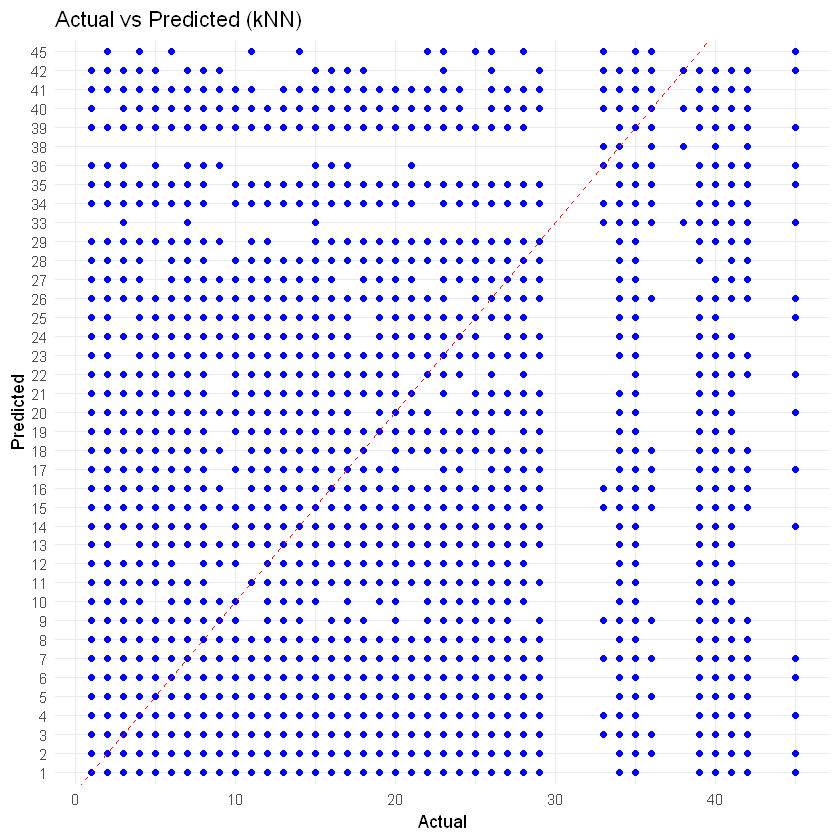

In [15]:
# Create a data frame with actual and predicted values
plot_data_knn <- data.frame(Actual = y_test, Predicted = knn_model)

# Plot the actual vs predicted graph
ggplot(plot_data_knn, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(x = "Actual", y = "Predicted", title = "Actual vs Predicted (kNN)") +
  theme_minimal()

# Dataset2: 

In [16]:
# Read the CSV file
Beachweather_path <- read_csv("Desktop/dmml_Ca1/Beach_Weather_Stations_Automated_Sensors.csv")

# Subset the data starting from the 10001st row
beachweather_trimmed <- Beachweather_path[10000:nrow(Beachweather_path), ]

# Print the first 10 rows
head(beachweather_trimmed, 10)

Rows: 168610 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): Station Name, Measurement Timestamp, Measurement Timestamp Label, ...
dbl (14): Air Temperature, Wet Bulb Temperature, Humidity, Rain Intensity, I...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Station Name,Measurement Timestamp,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,Wind Speed,Maximum Wind Speed,Barometric Pressure,Solar Radiation,Heading,Battery Life,Measurement Timestamp Label,Measurement ID
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Oak Street Weather Station,06/12/2020 11:00:00 PM,13.5,10.8,72,0,0.0,27.6,0,22,4.4,6.2,1003.5,0,357,12.0,06/12/2020 11:00 PM,OakStreetWeatherStation202006122300
63rd Street Weather Station,06/13/2020 12:00:00 AM,14.2,11.9,77,0,0.0,278.7,0,21,6.8,10.3,1002.2,2,351,11.9,06/13/2020 12:00 AM,63rdStreetWeatherStation202006132400
Oak Street Weather Station,06/13/2020 12:00:00 AM,14.0,11.6,76,0,0.0,27.6,0,29,5.0,5.8,1003.4,0,357,12.0,06/13/2020 12:00 AM,OakStreetWeatherStation202006132400
63rd Street Weather Station,06/13/2020 03:00:00 AM,14.1,11.7,76,0,2.9,281.6,0,45,3.7,8.5,1002.4,3,351,11.9,06/13/2020 3:00 AM,63rdStreetWeatherStation202006130300
Oak Street Weather Station,06/13/2020 03:00:00 AM,13.8,11.3,75,0,0.5,29.0,0,39,5.2,7.9,1003.7,0,357,12.0,06/13/2020 3:00 AM,OakStreetWeatherStation202006130300
63rd Street Weather Station,06/13/2020 04:00:00 AM,13.6,11.3,76,0,0.9,282.5,0,27,6.6,10.1,1002.8,2,351,11.8,06/13/2020 4:00 AM,63rdStreetWeatherStation202006130400
Oak Street Weather Station,06/13/2020 04:00:00 AM,13.2,10.5,71,0,0.0,29.0,0,34,6.7,8.4,1004.0,0,357,12.1,06/13/2020 4:00 AM,OakStreetWeatherStation202006130400
63rd Street Weather Station,06/13/2020 06:00:00 AM,12.7,10.8,80,0,0.0,282.5,0,27,7.6,11.4,1003.7,30,350,11.8,06/13/2020 6:00 AM,63rdStreetWeatherStation202006130600
Oak Street Weather Station,06/13/2020 06:00:00 AM,12.3,10.1,76,0,0.0,29.0,0,38,6.4,7.8,1005.0,22,357,11.9,06/13/2020 6:00 AM,OakStreetWeatherStation202006130600


In [17]:
str(beachweather_trimmed)

tibble [158,611 × 18] (S3: tbl_df/tbl/data.frame)
 $ Station Name               : chr [1:158611] "Oak Street Weather Station" "63rd Street Weather Station" "Oak Street Weather Station" "63rd Street Weather Station" ...
 $ Measurement Timestamp      : chr [1:158611] "06/12/2020 11:00:00 PM" "06/13/2020 12:00:00 AM" "06/13/2020 12:00:00 AM" "06/13/2020 03:00:00 AM" ...
 $ Air Temperature            : num [1:158611] 13.5 14.2 14 14.1 13.8 13.6 13.2 12.7 12.3 12.5 ...
 $ Wet Bulb Temperature       : num [1:158611] 10.8 11.9 11.6 11.7 11.3 11.3 10.5 10.8 10.1 10.9 ...
 $ Humidity                   : num [1:158611] 72 77 76 76 75 76 71 80 76 83 ...
 $ Rain Intensity             : num [1:158611] 0 0 0 0 0 0 0 0 0 0 ...
 $ Interval Rain              : num [1:158611] 0 0 0 2.9 0.5 0.9 0 0 0 0 ...
 $ Total Rain                 : num [1:158611] 27.6 278.7 27.6 281.6 29 ...
 $ Precipitation Type         : num [1:158611] 0 0 0 0 0 0 0 0 0 0 ...
 $ Wind Direction             : num [1:158611] 22 21 2

In [18]:
# Define columns to remove
columns_to_remove <- c('Station Name', 'Interval Rain', 'Precipitation Type', 'Measurement ID',
                       'Measurement Timestamp Label', 'Heading', 'Solar Radiation', 'Maximum Wind Speed')

# Remove the specified columns
beachweather_trimmed <- beachweather_trimmed[, !colnames(beachweather_trimmed) %in% columns_to_remove]

# Print the column names
print(colnames(beachweather_trimmed))

 [1] "Measurement Timestamp" "Air Temperature"       "Wet Bulb Temperature" 
 [4] "Humidity"              "Rain Intensity"        "Total Rain"           
 [7] "Wind Direction"        "Wind Speed"            "Barometric Pressure"  
[10] "Battery Life"         


In [19]:
colSums(is.na(beachweather_trimmed))

Measurement Timestamp       Air Temperature  Wet Bulb Temperature 
                    0                    75                 55510 
             Humidity        Rain Intensity            Total Rain 
                    0                 55510                 55510 
       Wind Direction            Wind Speed   Barometric Pressure 
                    0                     0                   146 
         Battery Life 
                    0

In [20]:
# Remove rows with missing values
beachweather_cleaned <- na.omit(beachweather_trimmed)
colSums(is.na(beachweather_cleaned))

Measurement Timestamp       Air Temperature  Wet Bulb Temperature 
                    0                     0                     0 
             Humidity        Rain Intensity            Total Rain 
                    0                     0                     0 
       Wind Direction            Wind Speed   Barometric Pressure 
                    0                     0                     0 
         Battery Life 
                    0

In [21]:
nrow(beachweather_cleaned)
ncol(beachweather_cleaned)

[1] 103026

[1] 10

In [22]:
# Load the required library
library(caret)

# Remove the specified columns
X <- beachweather_cleaned[, !(names(beachweather_cleaned) %in% c('Rain Intensity', 'Battery Life', 'Measurement Timestamp'))]

# Create the binary response variable y
y <- as.integer(beachweather_cleaned$`Rain Intensity` > 0)

# Split the data into training and testing sets (70% train, 30% test)
set.seed(42)
trainIndex <- createDataPartition(y, p = 0.7, list = FALSE)
X_train <- X[trainIndex, ]
y_train <- y[trainIndex]
X_test <- X[-trainIndex, ]
y_test <- y[-trainIndex]

# Standardize the features by removing the mean and scaling to unit variance
preProcValues <- preProcess(X_train, method = c("center", "scale"))
X_train_scaled <- predict(preProcValues, X_train)
X_test_scaled <- predict(preProcValues, X_test)

# Initialize and train the logistic regression model
logreg_model <- glm(y_train ~ ., data = as.data.frame(X_train_scaled), family = binomial)

# Predict on the test set
y_pred_prob <- predict(logreg_model, newdata = as.data.frame(X_test_scaled), type = "response")

# Convert predicted probabilities to binary predictions
y_pred_binary <- ifelse(y_pred_prob > 0.5, 1, 0)

# Calculate accuracy
accuracy <- sum(y_pred_binary == y_test) / length(y_test)
print(paste("Accuracy:", round(accuracy, digits = 4)))

# Compute confusion matrix
conf_matrix <- confusionMatrix(data = factor(y_pred_binary), reference = factor(y_test))

# Extract F1 score from confusion matrix
f1_score <- 2 * conf_matrix$byClass["Pos Pred Value"] * conf_matrix$byClass["Sensitivity"] / (conf_matrix$byClass["Pos Pred Value"] + conf_matrix$byClass["Sensitivity"])

# Print F1 score
print(paste("F1 Score:", round(f1_score, digits = 4)))

[1] "Accuracy: 0.9642"
[1] "F1 Score: 0.9818"


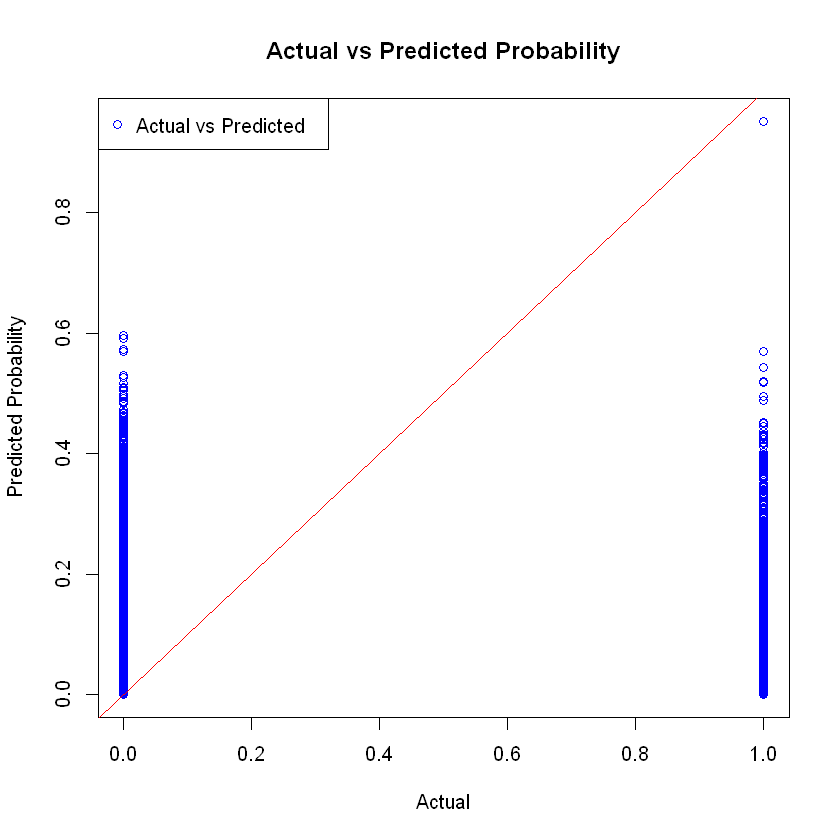

In [23]:
# Plot actual vs predicted graph
plot(y_test, y_pred_prob, xlab = "Actual", ylab = "Predicted Probability", main = "Actual vs Predicted Probability", col = "blue")

# Add a reference line for y = x
abline(0, 1, col = "red")

# Add legend
legend("topleft", legend = c("Actual vs Predicted"), col = c("blue"), pch = 1)


In [24]:
# Initialize and train the K Nearest Neighbors classifier
k <- 5  # Number of neighbors
knn_model <- knn(train = X_train, test = X_test, cl = y_train, k = k)

# Calculate accuracy
accuracy <- sum(knn_model == y_test) / length(y_test)
print(paste("Accuracy:", round(accuracy, digits = 4)))

# Compute confusion matrix for KNN model
conf_matrix_knn <- confusionMatrix(data = factor(knn_model), reference = factor(y_test))

# Extract F1 score from confusion matrix for KNN model
f1_score_knn <- 2 * conf_matrix_knn$byClass["Pos Pred Value"] * conf_matrix_knn$byClass["Sensitivity"] / (conf_matrix_knn$byClass["Pos Pred Value"] + conf_matrix_knn$byClass["Sensitivity"])

# Print F1 score for KNN model
print(paste("F1 Score:", round(f1_score_knn, digits = 4)))

[1] "Accuracy: 0.9635"
[1] "F1 Score: 0.9814"


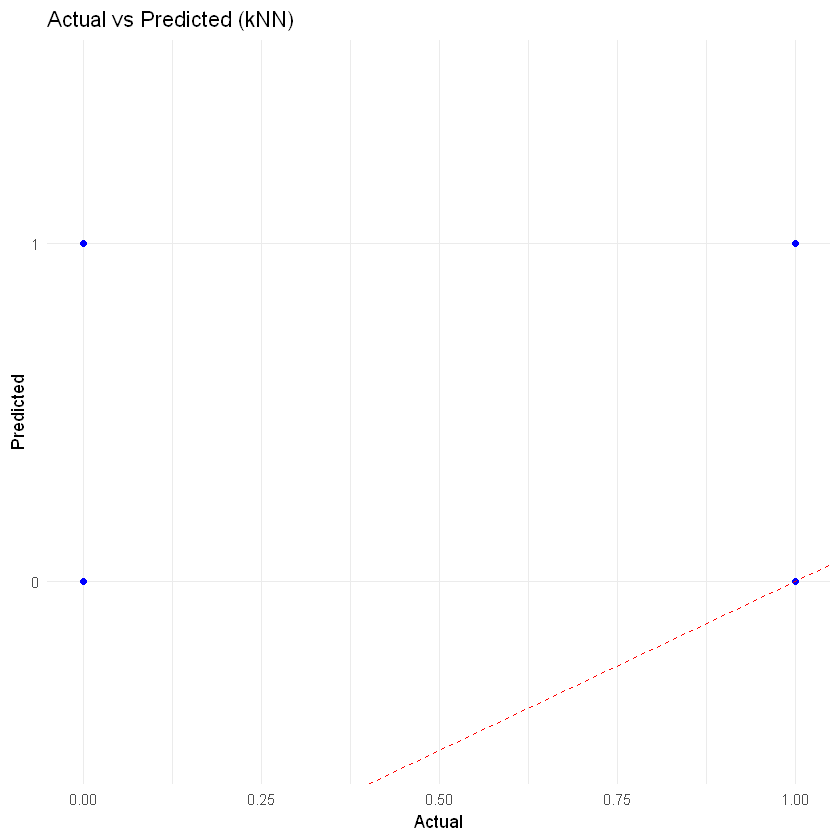

In [25]:
# Create a data frame with actual and predicted values
plot_data_knn <- data.frame(Actual = y_test, Predicted = knn_model)

# Plot the actual vs predicted graph
ggplot(plot_data_knn, aes(x = Actual, y = Predicted)) +
  geom_point(color = "blue") +
  geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
  labs(x = "Actual", y = "Predicted", title = "Actual vs Predicted (kNN)") +
  theme_minimal()

# Dataset 3: Real estate

In [26]:
# Read the CSV file
Real_estate_path <- read_csv("Desktop/dmml_Ca1/Real_Estate_Sales_2001-2021_GL.csv")

# Subset the data starting from the 10001st row
Real_estate_path_trimmed <- Real_estate_path[1:10000, ]

# Print the first 10 rows
head(Real_estate_path_trimmed, 10)

Rows: 1054159 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): Date Recorded, Town, Address, Property Type, Residential Type, Non ...
dbl (5): Serial Number, List Year, Assessed Value, Sale Amount, Sales Ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500,325000,0.4630,Commercial,NA,NA,NA,NA,NA
20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000,430000,0.5883,Residential,Single Family,NA,NA,NA,NA
210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730,805000,0.4096,Residential,Single Family,NA,NA,NA,POINT (-72.846365959 41.781677018)
200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400,179900,0.7248,Residential,Condo,NA,NA,NA,NA
200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,0.6958,Residential,Single Family,NA,NA,NA,NA
200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330,1447500,0.5957,Residential,Single Family,NA,NA,NA,NA
200109,2020,12/09/2020,Avon,57 FAR HILLS DRIVE,847520,1250000,0.6780,Residential,Single Family,NA,NA,NA,NA
2020180,2020,03/01/2021,Berlin,1539 FARMINGTON AVE,234200,130000,1.8015,Residential,Two Family,08 - Part Interest,NA,NA,NA
2020313,2020,07/01/2021,Berlin,216 WATCH HILL RD,412000,677500,0.6081,Residential,Single Family,NA,NA,NA,NA


In [27]:
str(Real_estate_path_trimmed)

tibble [10,000 × 14] (S3: tbl_df/tbl/data.frame)
 $ Serial Number   : num [1:10000] 2020348 20002 210317 200212 200243 ...
 $ List Year       : num [1:10000] 2020 2020 2021 2020 2020 ...
 $ Date Recorded   : chr [1:10000] "09/13/2021" "10/02/2020" "07/05/2022" "03/09/2021" ...
 $ Town            : chr [1:10000] "Ansonia" "Ashford" "Avon" "Avon" ...
 $ Address         : chr [1:10000] "230 WAKELEE AVE" "390 TURNPIKE RD" "53 COTSWOLD WAY" "5 CHESTNUT DRIVE" ...
 $ Assessed Value  : num [1:10000] 150500 253000 329730 130400 619290 ...
 $ Sale Amount     : num [1:10000] 325000 430000 805000 179900 890000 ...
 $ Sales Ratio     : num [1:10000] 0.463 0.588 0.41 0.725 0.696 ...
 $ Property Type   : chr [1:10000] "Commercial" "Residential" "Residential" "Residential" ...
 $ Residential Type: chr [1:10000] NA "Single Family" "Single Family" "Condo" ...
 $ Non Use Code    : chr [1:10000] NA NA NA NA ...
 $ Assessor Remarks: chr [1:10000] NA NA NA NA ...
 $ OPM remarks     : chr [1:10000] NA NA NA

In [28]:
# Define columns to remove
columns_to_remove <- c('Serial Number', 'Address', 'Non Use Code', 'Assessor Remarks'
                    , 'OPM remarks', 'Location', 'Residential Type')

# Remove the specified columns
Real_estate_path_trimmed <- Real_estate_path_trimmed[, !colnames(Real_estate_path_trimmed) %in% columns_to_remove]

# Print the column names
print(colnames(Real_estate_path_trimmed))

[1] "List Year"      "Date Recorded"  "Town"           "Assessed Value"
[5] "Sale Amount"    "Sales Ratio"    "Property Type" 


In [29]:
colSums(is.na(Real_estate_path_trimmed))

List Year  Date Recorded           Town Assessed Value    Sale Amount 
             0              0              0              0              0 
   Sales Ratio  Property Type 
             0            119

In [30]:
# Remove rows with missing values
Real_estate_cleaned <- na.omit(Real_estate_path_trimmed)
colSums(is.na(Real_estate_cleaned))

List Year  Date Recorded           Town Assessed Value    Sale Amount 
             0              0              0              0              0 
   Sales Ratio  Property Type 
             0              0

In [31]:
nrow(Real_estate_cleaned)
ncol(Real_estate_cleaned)

[1] 9881

[1] 7

In [32]:
# # Remove variables with zero variances
# Real_estate_cleaned <- Real_estate_cleaned[, colSums(var(Real_estate_cleaned)) > 0]

# Apply one-hot encoding to convert categorical town names to numeric by converting them to dummy values
X <- model.matrix(~.-1, data = Real_estate_cleaned[, setdiff(names(Real_estate_cleaned), c("Property Type", "Date Recorded"))])

# Apply label encoding to convert categorical property types to numeric
y <- as.factor(Real_estate_cleaned$`Property Type`)

# Split the data into training and testing sets (70% train, 30% test)
set.seed(42)
trainIndex <- createDataPartition(y, p = 0.7, list = FALSE)
X_train <- X[trainIndex, ]
y_train <- y[trainIndex]
X_test <- X[-trainIndex, ]
y_test <- y[-trainIndex]

# Standardize the features by removing the mean and scaling to unit variance
preProcValues <- preProcess(X_train, method = c("center", "scale"))
X_train_scaled <- predict(preProcValues, X_train)
X_test_scaled <- predict(preProcValues, X_test)

# Initialize and train the logistic regression model
logreg_model <- glmnet(X_train_scaled, y_train, family = "multinomial")

# Predict on the test set
y_pred <- predict(logreg_model, newx = X_test_scaled, s = 0.01, type = "class")

# Calculate accuracy
accuracy <- sum(y_pred == y_test) / length(y_test)
print(paste("Accuracy:", round(accuracy, digits = 4)))

# Compute confusion matrix
conf_matrix <- table(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision <- conf_matrix[2, 2] / sum(conf_matrix[, 2])
recall <- conf_matrix[2, 2] / sum(conf_matrix[2, ])
f1_score <- 2 * precision * recall / (precision + recall)

# Print F1 score
print(paste("F1 Score:", round(f1_score, digits = 4)))


Warning message in preProcess.default(X_train, method = c("center", "scale")):
"These variables have zero variances: TownOrange, TownPortland, TownRedding, TownRoxbury, TownSouth Windsor, TownSterling, TownThomaston, TownWarren, TownWestport, TownWillington, TownWolcott"
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
"one multinomial or binomial class has fewer than 8  observations; dangerous ground"
Warning message:
"from glmnet C++ code (error code -29); Convergence for 29th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned"


[1] "Accuracy: 0.9038"
[1] "F1 Score: 0.0729"


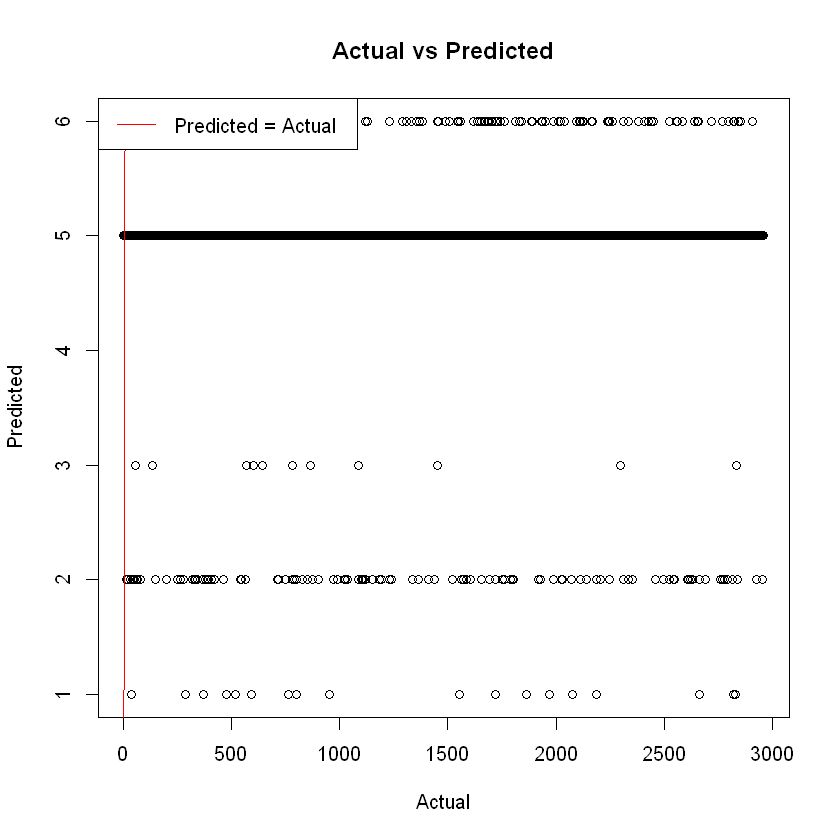

In [33]:
# Create a data frame with actual and predicted values
plot_data <- data.frame(Actual = y_test, Predicted = y_pred)

# Plot a scatter plot
plot(plot_data$Actual, plot_data$Predicted, 
     xlab = "Actual", ylab = "Predicted",
     main = "Actual vs Predicted")

# Add a diagonal line for reference
abline(0, 1, col = "red")

# Add legend
legend("topleft", legend = "Predicted = Actual", col = "red", lty = 1)


In [34]:
# Initialize and train the K Nearest Neighbors classifier
k <- 5  # Number of neighbors
knn_model <- knn(train = X_train, test = X_test, cl = y_train, k = k)

# Calculate accuracy
accuracy <- sum(knn_model == y_test) / length(y_test)
print(paste("Accuracy:", round(accuracy, digits = 4)))

# Calculate confusion matrix
conf_matrix <- confusionMatrix(knn_model, y_test)

# Calculate precision, recall, and F1 score
precision <- conf_matrix$byClass["Pos Pred Value"]
recall <- conf_matrix$byClass["Sensitivity"]
f1_score <- 2 * precision * recall / (precision + recall)

# Print F1 score
print(paste("F1 Score:", round(f1_score, digits = 4)))


[1] "Accuracy: 0.9092"
[1] "F1 Score: NA"


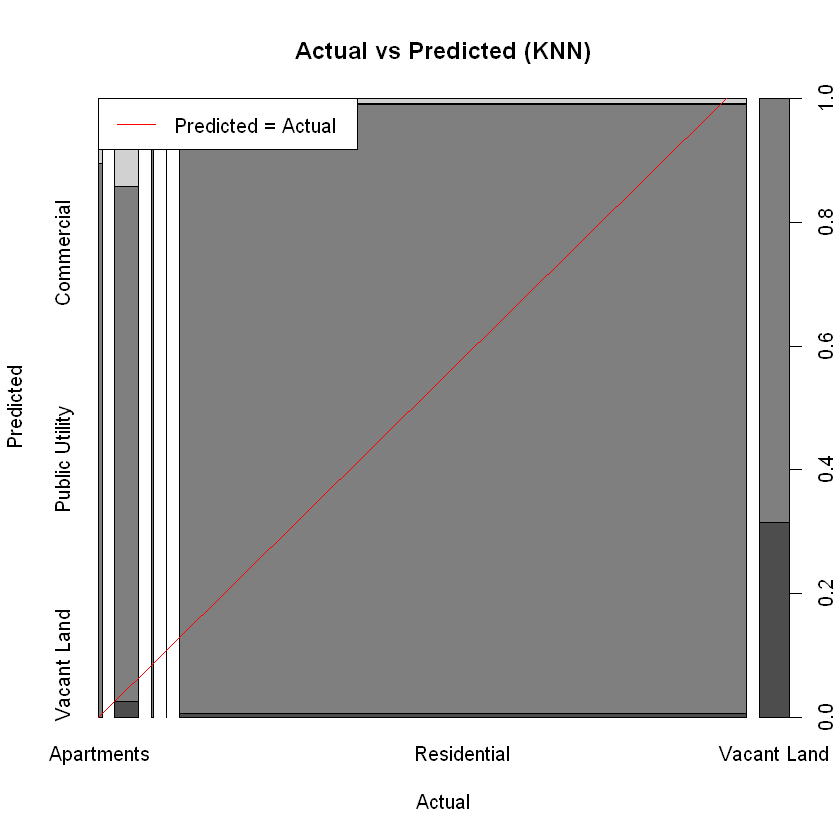

In [35]:
# Create a data frame with actual and predicted values for KNN
plot_data_knn <- data.frame(Actual = y_test, Predicted = knn_model)

# Plot a scatter plot for KNN
plot(plot_data_knn$Actual, plot_data_knn$Predicted, 
     xlab = "Actual", ylab = "Predicted",
     main = "Actual vs Predicted (KNN)")

# Add a diagonal line for reference
abline(0, 1, col = "red")

# Add legend
legend("topleft", legend = "Predicted = Actual", col = "red", lty = 1)
